**Q1) Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.**

In [4]:
!pip install selenium

In [3]:
# lets imports all required libraries.
import selenium
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings ("ignore")

In [3]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")
url="https://www.amazon.in/"
driver.get(url)

In [4]:
# Finding web element for all product
my_input=input("enter your product")
search_bar=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
search_bar.send_keys(my_input)
    

enter your productIPHONE


In [5]:
search_button=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_button.click()

**Q2) In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.**


In [97]:
# extracting the brand and product name
brand_name=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
brand_name[0].text

'Apple iPhone 13 Mini (128GB) - Midnight'

In [98]:
brand=[]
for i in brand_name:
    brand.append(i.text)
len(brand)
brand[0:2]

['Apple iPhone 13 Mini (128GB) - Midnight', 'Apple iPhone XR (128GB) - Coral']

In [99]:
# extracting the price
price=driver.find_elements_by_xpath('//span[@class="a-offscreen"]')
price[0].get_attribute('textContent')

'₹64,900'

In [100]:
price_=[]
for i in price:
    price_.append(i.get_attribute('textContent'))
len(price_)
price_[0:2]

['₹64,900', '₹69,900']

In [101]:
# extracting the expected delivery
delivery=driver.find_elements_by_xpath('//span[@class="a-color-base a-text-bold"]')
delivery[0].text

'Tomorrow, March 28'

In [102]:
deliv=[]
for i in delivery:
    deliv.append(i.text)
len(deliv)
deliv[0:2]

['Tomorrow, March 28', 'Tomorrow, March 28']

In [103]:
# extracting url
URL=driver.find_elements_by_xpath('//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
url=[]
for i in URL:
    url.append(i.get_attribute('href'))
len(url)
url[0:2]

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05577223E0X3RFND9NJV&url=%2FApple-iPhone-13-Mini-128GB%2Fdp%2FB09G9FNN4X%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1QUBZSPZ6JDOM%26keywords%3Diphone%26qid%3D1648361931%26sprefix%3Diphone%252Caps%252C627%26sr%3D8-1-spons%26psc%3D1&qualifier=1648361931&id=981795169238382&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A04779771QPHJE3H9EBW8&url=%2FNew-Apple-iPhone-XR-128GB%2Fdp%2FB08L8CPQH7%2Fref%3Dsr_1_2_sspa%3Fcrid%3D1QUBZSPZ6JDOM%26keywords%3Diphone%26qid%3D1648361931%26sprefix%3Diphone%252Caps%252C627%26sr%3D8-2-spons%26psc%3D1&qualifier=1648361931&id=981795169238382&widgetName=sp_atf']

In [112]:
next_=driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[24]/div/div/span/a[3]')

In [113]:
next_.click()

In [114]:
brand_name=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
price=driver.find_elements_by_xpath('//span[@class="a-offscreen"]')
delivery=driver.find_elements_by_xpath('//span[@class="a-color-base a-text-bold"]')
URL=driver.find_elements_by_xpath('//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')

In [115]:
for i in brand_name:
    brand.append(i.text)
for i in price:
    price_.append(i.get_attribute('textContent'))
for i in delivery:
    deliv.append(i.text)
for i in URL:
    url.append(i.get_attribute('href'))

In [116]:
next2=driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[24]/div/div/span/a[4]")


In [117]:
next2.click()

In [118]:
brand_name=driver.find_elements_by_xpath('//span[@class="a-size-medium a-color-base a-text-normal"]')
price=driver.find_elements_by_xpath('//span[@class="a-offscreen"]')
delivery=driver.find_elements_by_xpath('//span[@class="a-color-base a-text-bold"]')
URL=driver.find_elements_by_xpath('//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')

In [119]:
for i in brand_name:
    brand.append(i.text)
for i in price:
    price_.append(i.get_attribute('textContent'))
for i in delivery:
    deliv.append(i.text)
for i in URL:
    url.append(i.get_attribute('href'))

In [121]:
len(brand),len(price_),len(deliv),len(url)

(72, 121, 68, 72)

In [122]:
retu=[]
aval=[]
for i in range(68):
    retu.append('-')
    aval.append('-')


In [123]:
df=pd.DataFrame()
df['Brand_Product_Name']=brand[:68]
df["Return/Exchange"]=retu[:68]
df["Price"]=price_[:68]
df["Exprected Delivery"]=deliv[:68]
df["Availability"]=aval[:68]
df["Product URL"]=url[:68]
df

,Brand_Product_Name,Return/Exchange,Price,Exprected Delivery,Availability,Product URL
0,Apple iPhone 13 Mini (128GB) - Midnight,-,"₹64,900","Tomorrow, March 28",-,https://www.amazon.in/gp/slredirect/picassoRed...
1,Apple iPhone XR (128GB) - Coral,-,"₹69,900","Tomorrow, March 28",-,https://www.amazon.in/gp/slredirect/picassoRed...
2,Apple iPhone 12 (128GB) - Blue,-,"₹42,999","Tomorrow, March 28",-,https://www.amazon.in/New-Apple-iPhone-12-128G...
3,Apple iPhone 11 (64GB) - White,-,"₹52,900",Today 5PM,-,https://www.amazon.in/New-Apple-iPhone-11-64GB...
4,Apple iPhone 11 (64GB) - Black,-,"₹60,490",Today 5PM,-,https://www.amazon.in/New-Apple-iPhone-11-64GB...
...,...,...,...,...,...,...
63,Apple iPhone 12 Mini (128GB) - White,-,"₹79,900","Tomorrow, March 28",-,https://www.amazon.in/New-Apple-iPhone-Mini-12...
64,Apple iPhone 13 Pro Max (256 GB) - Alpine Green,-,"₹1,29,900","Tomorrow, March 28",-,https://www.amazon.in/Apple-iPhone-Pro-Max-256...
65,Apple iPhone 13 (256GB) - Starlight,-,"₹56,990",Today 5PM,-,https://www.amazon.in/Apple-iPhone-13-256GB-St...
66,Apple iPhone 13 Pro (128GB) - Graphite,-,"₹65,900","Tomorrow, March 28",-,https://www.amazon.in/Apple-iPhone-13-Pro-128G...


In [140]:
df.to_csv("iphone.csv")

**Q3) Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.**


In [230]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")
url="https://images.google.com/"
driver.get(url)

In [231]:
search_bar=driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
search_button=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div')
search_bar.send_keys("cars")
search_button.click()

''
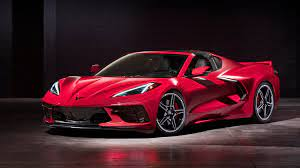

In [232]:
carimg=driver.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
carimg[0].get_attribute('src')

SyntaxError: invalid syntax (<ipython-input-242-1c38d0af388b>, line 1)

**Q4) Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.**


In [15]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")#
url="https://www.flipkart.com/"
driver.get(url)

In [16]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_bar.send_keys("smartphone")
search_bar.click()

In [239]:
# extracting brand
brand=driver.find_elements_by_xpath('//div[@class="_167Mu3 _2hbLCH"]')
brand

[]

In [184]:
# extracting smart phone name
smartphonename=driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
smartphonename[0].text

'realme C20 (Cool Grey, 32 GB)'

In [1]:
smartphone=[]
for i in smartphone:
    smartphone.append(i.text)
len(smartphone)
smartphone[0:2]

[]

**Q7) Write a program to scrap all the available details of best gaming laptops from digit.in.**

In [9]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")
url="https://www.digit.in/"
driver.get(url)

In [13]:

search_bar.send_keys("laptops")
search_bar.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=99.0.4844.84)
Stacktrace:
Backtrace:
	Ordinal0 [0x011D9943+2595139]
	Ordinal0 [0x0116C9F1+2148849]
	Ordinal0 [0x010643F0+1065968]
	Ordinal0 [0x0108C4D3+1230035]
	Ordinal0 [0x0108BB8B+1227659]
	Ordinal0 [0x010AB9EC+1358316]
	Ordinal0 [0x01087474+1209460]
	Ordinal0 [0x010ABC04+1358852]
	Ordinal0 [0x010BBAF2+1424114]
	Ordinal0 [0x010AB806+1357830]
	Ordinal0 [0x01086086+1204358]
	Ordinal0 [0x01086F96+1208214]
	GetHandleVerifier [0x0137B232+1658114]
	GetHandleVerifier [0x0143312C+2411516]
	GetHandleVerifier [0x0126F261+560433]
	GetHandleVerifier [0x0126E366+556598]
	Ordinal0 [0x0117286B+2173035]
	Ordinal0 [0x011775F8+2192888]
	Ordinal0 [0x011776E5+2193125]
	Ordinal0 [0x011811FC+2232828]
	BaseThreadInitThunk [0x74F7FA29+25]
	RtlGetAppContainerNamedObjectPath [0x76FE7A7E+286]
	RtlGetAppContainerNamedObjectPath [0x76FE7A4E+238]


**Q8) Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.**


In [13]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")
url="https://www.forbes.com/"
driver.get(url)

In [14]:
search_button=driver.find_element_by_xpath('/html/body/div[1]/header/nav/div[4]/button')
search_button.send_keys("billionaires")
search_button.click()

In [1]:
# extracting rank
rank=driver.find_elements_by_xpath('')

NameError: name 'driver' is not defined

**Q10) Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.**

In [12]:
# lets first connect to webdriver.
driver=webdriver.Chrome("chromedriver.exe")
url="https://www.hostelworld.com/"
driver.get(url)

In [14]:
search_loc=driver.find_element_by_xpath("/html/body/div[3]/div/div/div[1]/div[2]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/div/input")
search_loc

<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="3f76cbd2-7f21-4ac1-84f8-077f278ec874")>

In [15]:
search_loc.send_keys("London")

In [18]:
# extracting hostel name
hostel_name=driver.find_elements_by_xpath('//h2[@class="title title-6"]')
len(hostel_name)
hostel_name[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="b780b334-0cad-4285-ba5a-70f3a4d8f0d3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="1edb39c7-9ed2-4e67-823e-66d61ff770c1")>]

In [19]:
host_name=[]
for i in hostel_name:
    host_name.append(i.text)
len(host_name)
host_name[0:2]

['Safestay London Elephant & Castle', 'Generator London']

In [20]:
# extracting distance from the city
dist_city=driver.find_elements_by_xpath('//span[@class="description"]')
len(dist_city)
dist_city[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="909bf001-3003-4750-a707-82948ff3425b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="c976d7f6-cb32-4f18-b287-8da1f3455782")>]

In [21]:
distance_city=[]
for i in dist_city:
    distance_city.append(i.text)
len(distance_city)
distance_city[0:2]

['Hostel - 1.7km from city centre', 'Hostel - 3km from city centre']

In [22]:
# extracting ratings
rating=driver.find_elements_by_xpath('//div[@class="score orange big"]')
len(rating)
rating[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="9522eea4-3b75-49a0-92e7-1a6da0547492")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="85360650-24a6-4387-87c2-c08e8559dd2e")>]

In [23]:
rate=[]
for i in rating:
    rate.append(i.text)
len(rate)
rate[0:2]

['7.7', '7.8']

In [24]:
# extracting total reviews
tot_reviews=driver.find_elements_by_xpath('//div[@class="reviews"]')
len(tot_reviews)
tot_reviews[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="09b58ae2-772d-4089-96b5-6a76c70a1ed7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="13f1934e-1974-4d72-8336-74914ab2a28c")>]

In [26]:
total_reviews=[]
for i in tot_reviews:
    total_reviews.append(i.text)
len(total_reviews)
total_reviews[0:2]

['4126 Total Reviews', '6847 Total Reviews']

In [27]:
# extraction overall reviews
over_reviews=driver.find_elements_by_xpath('//span[@data-v-1a6916de]')
len(over_reviews)
over_reviews[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="67cd23e0-b359-4add-bf81-ebf8f16320d1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="83823f72-3f7e-4da3-bc68-0a8b4f1844dd")>]

In [28]:
overall_reviews=[]
for i in over_reviews:
    overall_reviews.append(i.text)
len(overall_reviews)
overall_reviews[0:2]

['Very Good', 'Very Good']

In [37]:
# extracting private from price
priv_price=driver.find_elements_by_xpath('//p[@data-v-2f0a89ac]')
len(priv_price)
priv_price[0:2]

[<selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="80623da7-9e2d-4a50-8660-99d59b1f93f0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="5915f52e739e17290a5f346f634c5525", element="9599370c-7a3d-466f-9a8f-96c37f6957b3")>]

In [38]:
private_price=[]
for i in priv_price:
    private_price.append(i.text)
len(private_price)
private_price[0:2]

['No Privates Available', 'Dorms From']